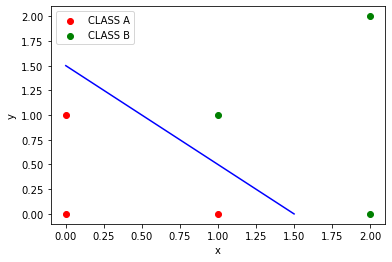

In [21]:
##SECTION A
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(0,0,color="red",label="CLASS A")
plt.scatter(1,0,color="red")
plt.scatter(0,1,color="red")
plt.scatter(1,1,color="green",label="CLASS B")
plt.scatter(2,2,color="green")
plt.scatter(2,0,color="green")

plt.legend()

x = np.linspace(0,1.5,100)
y = -1*x+1.5
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, '-b')

SyntaxError: invalid syntax (1709960180.py, line 2)

In [1]:
#SECTION C
import gzip
import numpy as np
import matplotlib.pyplot as plt
with gzip.open("/Users/vasukhanna/Desktop/t10k-labels-idx1-ubyte.gz", 'rb') as testLbpath:
     test_Label = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)





with gzip.open("/Users/vasukhanna/Desktop/t10k-images-idx3-ubyte.gz", 'rb') as testSetpath:
     test_Image = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(test_Label), 784)
with gzip.open("/Users/vasukhanna/Desktop/train-labels-idx1-ubyte.gz", 'rb') as trainLbpath:
     train_Label = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open("/Users/vasukhanna/Desktop/train-images-idx3-ubyte.gz", 'rb') as trainSetpath:
     train_Image = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(train_Label), 784)



In [2]:
train_Image=train_Image.reshape(60000,784)

In [3]:
from sklearn.model_selection import train_test_split
train_images = (train_Image / 255) 
test_images = (test_Image / 255) 

x_train, x_val,y_train, y_val = train_test_split(train_images,train_Label ,random_state=104, test_size=0.15, shuffle=True)


*******************************

For  tanh  Activation Function: 


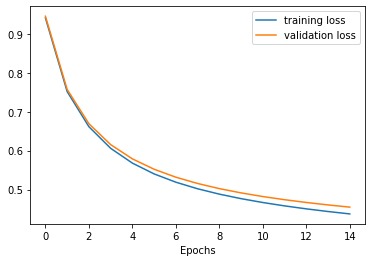

Training set accuracy score(in %):  84.71960784313725
Validation set accuracy score(in %):  84.04444444444444
Test set accuracy score(in %):  83.43

*******************************

For  relu  Activation Function: 


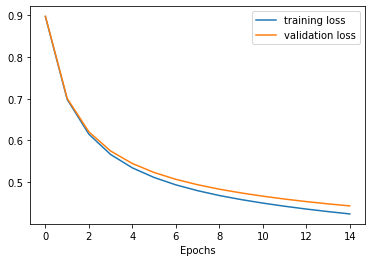

Training set accuracy score(in %):  85.31176470588235
Validation set accuracy score(in %):  84.66666666666667
Test set accuracy score(in %):  83.89999999999999

*******************************

For  identity  Activation Function: 


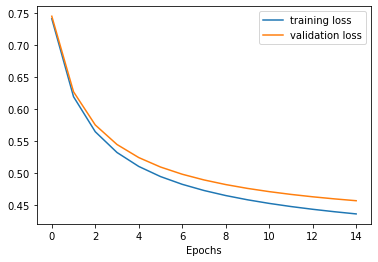

Training set accuracy score(in %):  84.97450980392158
Validation set accuracy score(in %):  84.41111111111111
Test set accuracy score(in %):  83.39

*******************************

For  logistic  Activation Function: 


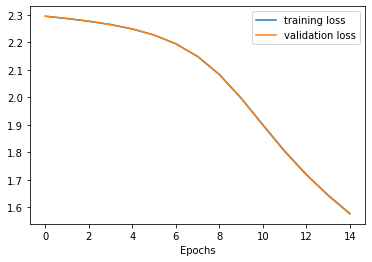

Training set accuracy score(in %):  51.76274509803922
Validation set accuracy score(in %):  52.022222222222226
Test set accuracy score(in %):  52.59
*******************************


In [8]:
# PART A
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
# from sklearn.preprocessing import LabelBinariser

list_act=["tanh","relu","identity","logistic"]
j=0


while j<len(list_act):
    
    clf = MLPClassifier(activation=list_act[j],max_iter=12,hidden_layer_sizes=(256,32),solver="sgd",random_state=100)
    print("\n*******************************\n")
    print("For ",list_act[j]," Activation Function: ")
    trainlist=[]
    validationlist=[]
    for i in range(15):
        clf.partial_fit(x_train, y_train,classes=np.unique(y_train))
        
        pred = clf.predict_proba(x_train)
        a=log_loss(y_train,clf.predict_proba(x_train))
        trainlist.append(a)
        b=log_loss(y_val,clf.predict_proba(x_val))
        validationlist.append(b)
    
    
    plt.plot(trainlist,label="training loss")
    plt.plot(validationlist,label="validation loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    print("Training set accuracy score(in %): " , clf.score(x_train, y_train)*100)
    print("Validation set accuracy score(in %): " , clf.score(x_val, y_val)*100)
    print("Test set accuracy score(in %): " ,clf.score(test_images, test_Label)*100)
    
    
    j=j+1

print("*******************************")


*******************************

For learning Rate:  0.1


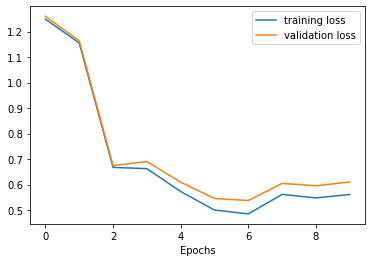

Training set accuracy score(in %):  82.35882352941177
Validation set accuracy score(in %):  81.38888888888889
Test set accuracy score(in %):  80.71000000000001

*******************************


*******************************

For learning Rate:  0.01


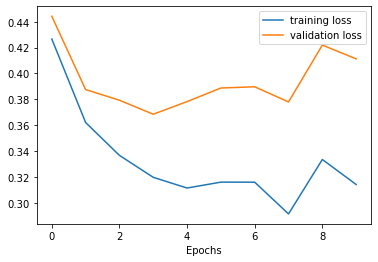

Training set accuracy score(in %):  88.60588235294118
Validation set accuracy score(in %):  86.34444444444445
Test set accuracy score(in %):  85.8

*******************************


*******************************

For learning Rate:  0.001


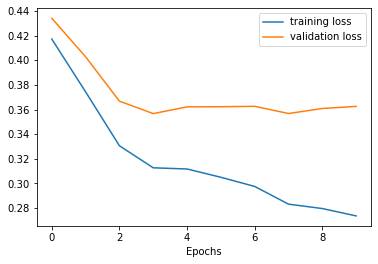

Training set accuracy score(in %):  89.78823529411764
Validation set accuracy score(in %):  87.5
Test set accuracy score(in %):  86.61999999999999

*******************************



In [9]:
#PART B

learning_rate=[0.1,0.01,0.001]
j=0
while j<len(learning_rate):
    vk = MLPClassifier(activation="relu",max_iter=12,learning_rate_init=learning_rate[j],hidden_layer_sizes=(256,32),random_state=10)
    print("\n*******************************\n")
    
    print("For learning Rate: ",learning_rate[j])
    
    
    
    
    
    trainlist_lr=[]
    validationlist_lr=[]
    for i in range(10):
        vk.partial_fit(x_train, y_train,classes=np.unique(y_train))
        
        a=log_loss(y_train,vk.predict_proba(x_train))
        trainlist_lr.append(a)
        b=log_loss(y_val,vk.predict_proba(x_val))
        validationlist_lr.append(b)
    
    
    plt.plot(trainlist_lr,label="training loss")
    plt.plot(validationlist_lr,label="validation loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    print("Training set accuracy score(in %): " , vk.score(x_train, y_train)*100)
    
    print("Validation set accuracy score(in %): " , vk.score(x_val, y_val)*100)
    
    print("Test set accuracy score(in %): " ,vk.score(test_images, test_Label)*100)
    
    print("\n*******************************\n")
    j=j+1

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


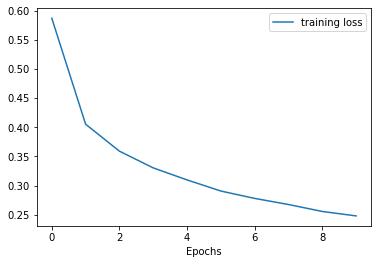


*******************************

The above plot is for hiddenLayer1  245  and hiddenLayer2  30
Training set accuracy score:(in %) 91.32000000000001
Test set accuracy score:(in %) 88.32

*******************************



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


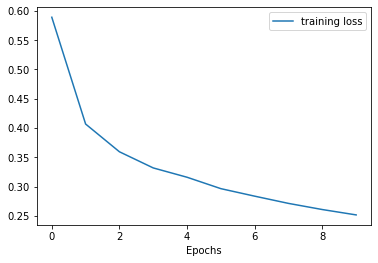


*******************************

The above plot is for hiddenLayer1  210  and hiddenLayer2  25
Training set accuracy score:(in %) 91.33666666666667
Test set accuracy score:(in %) 87.98

*******************************



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


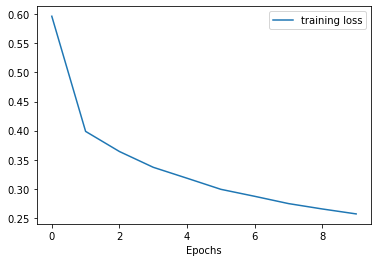


*******************************

The above plot is for hiddenLayer1  190  and hiddenLayer2  20
Training set accuracy score:(in %) 91.235
Test set accuracy score:(in %) 88.29

*******************************



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


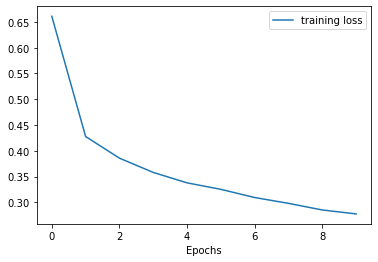


*******************************

The above plot is for hiddenLayer1  150  and hiddenLayer2  15
Training set accuracy score:(in %) 90.33333333333333
Test set accuracy score:(in %) 87.59

*******************************



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


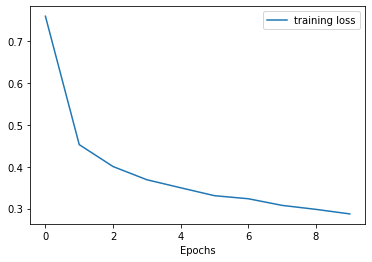


*******************************

The above plot is for hiddenLayer1  128  and hiddenLayer2  10
Training set accuracy score:(in %) 90.38666666666667
Test set accuracy score:(in %) 87.92

*******************************



In [13]:
#PART C
hiddenLayer1=[245,210,190,150,128]
hiddenLayer2=[30,25,20,15,10]
i=0
while(i<len(hiddenLayer1)):

    clf = MLPClassifier(activation="relu",max_iter=10,learning_rate_init=0.001,hidden_layer_sizes=(hiddenLayer1[i],hiddenLayer2[i]),
        validation_fraction=0.15,random_state=10)

    clf.fit(train_images, train_Label)
    plt.plot(clf.loss_curve_,label="training loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    print("\n*******************************\n")
    print("The above plot is for hiddenLayer1 ",hiddenLayer1[i]," and hiddenLayer2 ",hiddenLayer2[i])
    print("Training set accuracy score:(in %)", clf.score(train_images, train_Label)*100)
  
    print("Test set accuracy score:(in %)", clf.score(test_images, test_Label)*100)
    print("\n*******************************\n")
    i=i+1

In [44]:
#PART D
from sklearn.model_selection import GridSearchCV
grid = MLPClassifier(max_iter=10)


parameters = {'hidden_layer_sizes': [(245,30)],'activation': ['relu', 'logistic'],'solver': ['sgd', 'adam'],'alpha': [0.01,0.001,0.1 ],'learning_rate': ['constant','adaptive'],}
clf = GridSearchCV(grid, parameters, n_jobs=-1, cv=5)

clf.fit(train_images, train_Label)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilaye

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.001, 0.1],
                         'hidden_layer_sizes': [(245, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [45]:
print('The most optimal parameters observed are :', clf.best_params_)

The most optimal parameters observed are : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (245, 30), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
#Section B

import numpy as np 
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def Sigmoid_grad(x):
    return np.exp(-x)/(np.exp(-x)+1)**2

def relu(x):
    return max(0.0, x)
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def leaky_relu(x):
    if x>0 :
        return x
    else :
        return 0.01*x
def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

def linear(x):
    return x
def linear_derivative(x):
    return 1

def softmax(x):
    
    return np.exp(x) / np.sum(np.exp(x), axis=0)

